In [50]:
import numpy as np
from math import *
from scipy import optimize as opt
import bisect
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("clean_data.csv")

In [52]:
df

,how_old_are_you,adjusted_annual_salary,annual_salary,currency,country,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race,industry
0,25-34,0.885018,55000.0,USD,USA,5-7 years,5-7 years,Master's degree,Woman,White,Education
1,25-34,1.527665,54600.0,GBP,United Kingdom,8 - 10 years,5-7 years,College degree,Non-binary,White,Technology & Science
2,25-34,0.547102,34000.0,USD,USA,2 - 4 years,2 - 4 years,College degree,Woman,White,Banking & Insurance
3,25-34,1.045931,62000.0,USD,USA,8 - 10 years,5-7 years,College degree,Woman,White,Non profit Organization
4,25-34,1.078113,60000.0,USD,USA,8 - 10 years,5-7 years,College degree,Woman,White,Banking & Insurance
...,...,...,...,...,...,...,...,...,...,...,...
25115,25-34,1.399938,85000.0,USD,USA,5-7 years,5-7 years,College degree,Woman,White,Unidentified
25116,35-44,0.643650,40000.0,USD,USA,11 - 20 years,2 - 4 years,College degree,Woman,Asian or Asian American,Non profit Organization
25117,25-34,2.848150,148000.0,USD,USA,11 - 20 years,11 - 20 years,Master's degree,Woman,White,Technology & Science
25118,25-34,1.126387,65000.0,USD,USA,2 - 4 years,2 - 4 years,College degree,Woman,White,Advertising


# Ordinal data processing

In [53]:
df['how_old_are_you'].unique()

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [54]:
df['overall_years_of_professional_experience'].unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [55]:
df['years_of_experience_in_field'].unique()

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [56]:
df['highest_level_of_education_completed'].unique()

array(["Master's degree", 'College degree', 'PhD', 'Unknown',
       'Some college', 'High School',
       'Professional degree (MD, JD, etc.)'], dtype=object)

In [57]:
mask_18 = df['how_old_are_you'] == 'under 18'
mask_21 = df['how_old_are_you'] == '18-24'
mask_30 = df['how_old_are_you'] == '25-34'
mask_40 = df['how_old_are_you'] == '35-44'
mask_50 = df['how_old_are_you'] == '45-54'
mask_60 = df['how_old_are_you'] == '55-64'
mask_65 = df['how_old_are_you'] == '65 or over'
df.loc[mask_18, 'how_old_are_you'] = 1
df.loc[mask_21, 'how_old_are_you'] = 2
df.loc[mask_30, 'how_old_are_you'] = 3
df.loc[mask_40, 'how_old_are_you'] = 4
df.loc[mask_50, 'how_old_are_you'] = 5
df.loc[mask_60, 'how_old_are_you'] = 6
df.loc[mask_65, 'how_old_are_you'] = 7
df['how_old_are_you'] = pd.to_numeric(df['how_old_are_you'], errors='coerce')

In [58]:
mask_1 = df['overall_years_of_professional_experience'] == '1 year or less'
mask_3 = df['overall_years_of_professional_experience'] == '2 - 4 years'
mask_6 = df['overall_years_of_professional_experience'] == '5-7 years'
mask_9 = df['overall_years_of_professional_experience'] == '8 - 10 years'
mask_15 = df['overall_years_of_professional_experience'] == '11 - 20 years'
mask_25 = df['overall_years_of_professional_experience'] == '21 - 30 years'
mask_35 = df['overall_years_of_professional_experience'] == '31 - 40 years'
mask_41 = df['overall_years_of_professional_experience'] == '41 years or more'
df.loc[mask_1, 'overall_years_of_professional_experience'] = 1
df.loc[mask_3, 'overall_years_of_professional_experience'] = 2
df.loc[mask_6, 'overall_years_of_professional_experience'] = 3
df.loc[mask_9, 'overall_years_of_professional_experience'] = 4
df.loc[mask_15, 'overall_years_of_professional_experience'] = 5
df.loc[mask_25, 'overall_years_of_professional_experience'] = 6
df.loc[mask_35, 'overall_years_of_professional_experience'] = 7
df.loc[mask_41, 'overall_years_of_professional_experience'] = 8
df['overall_years_of_professional_experience'] = pd.to_numeric(df['overall_years_of_professional_experience'], errors='coerce')

In [59]:
mask_1 = df['years_of_experience_in_field'] == '1 year or less'
mask_3 = df['years_of_experience_in_field'] == '2 - 4 years'
mask_6 = df['years_of_experience_in_field'] == '5-7 years'
mask_9 = df['years_of_experience_in_field'] == '8 - 10 years'
mask_15 = df['years_of_experience_in_field'] == '11 - 20 years'
mask_25 = df['years_of_experience_in_field'] == '21 - 30 years'
mask_35 = df['years_of_experience_in_field'] == '31 - 40 years'
mask_41 = df['years_of_experience_in_field'] == '41 years or more'
df.loc[mask_1, 'years_of_experience_in_field'] = 1
df.loc[mask_3, 'years_of_experience_in_field'] = 2
df.loc[mask_6, 'years_of_experience_in_field'] = 3
df.loc[mask_9, 'years_of_experience_in_field'] = 4
df.loc[mask_15, 'years_of_experience_in_field'] = 5
df.loc[mask_25, 'years_of_experience_in_field'] = 6
df.loc[mask_35, 'years_of_experience_in_field'] = 7
df.loc[mask_41, 'years_of_experience_in_field'] = 8
df['years_of_experience_in_field'] = pd.to_numeric(df['years_of_experience_in_field'], errors='coerce')

In [60]:
mask_5 = df['highest_level_of_education_completed'] == 'High School'
mask_10 = df['highest_level_of_education_completed'] == 'Some college'
mask_15 = df['highest_level_of_education_completed'] == 'College degree'
mask_20 = df['highest_level_of_education_completed'] == 'Professional degree (MD, JD, etc.)'
mask_25 = df['highest_level_of_education_completed'] == "Master's degree"
mask_30 = df['highest_level_of_education_completed'] == 'PhD'
mask_nan = df['highest_level_of_education_completed'] == 'Unknown'
df.loc[mask_5, 'highest_level_of_education_completed'] = 1
df.loc[mask_10, 'highest_level_of_education_completed'] = 2
df.loc[mask_15, 'highest_level_of_education_completed'] = 3
df.loc[mask_20, 'highest_level_of_education_completed'] = 4
df.loc[mask_25, 'highest_level_of_education_completed'] = 5
df.loc[mask_30, 'highest_level_of_education_completed'] = 6
df.loc[mask_nan, 'highest_level_of_education_completed'] =  float("NaN")
df['highest_level_of_education_completed'] = pd.to_numeric(df['highest_level_of_education_completed'], errors='coerce')

In [61]:
df.isna().sum()

how_old_are_you                               0
adjusted_annual_salary                        0
annual_salary                                 0
currency                                      0
country                                       0
overall_years_of_professional_experience      0
years_of_experience_in_field                  0
highest_level_of_education_completed        182
gender                                        0
race                                          0
industry                                      0
dtype: int64

In [62]:
df_clean = df.dropna()

In [63]:
df_clean = df_clean.drop(["adjusted_annual_salary", "currency", "country", "gender", "race", "industry"], axis=1)
df_clean

,how_old_are_you,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed
0,3,55000.0,3,3,5.0
1,3,54600.0,4,3,3.0
2,3,34000.0,2,2,3.0
3,3,62000.0,4,3,3.0
4,3,60000.0,4,3,3.0
...,...,...,...,...,...
25115,3,85000.0,3,3,3.0
25116,4,40000.0,5,2,3.0
25117,3,148000.0,5,5,5.0
25118,3,65000.0,2,2,3.0


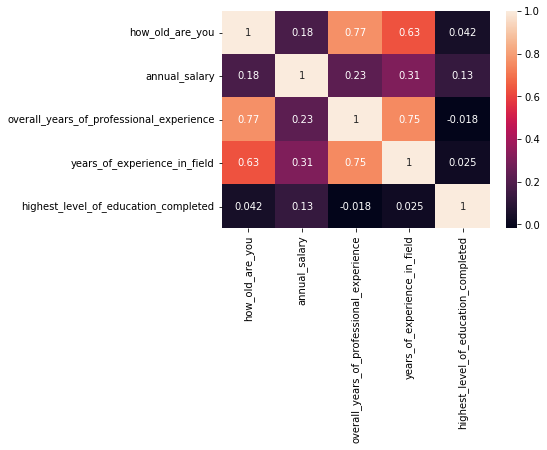

In [64]:
corr = df_clean.corr()
sns.heatmap(corr, annot=True)

# Fully Corrective Binning 

In [65]:
Y = df_clean["annual_salary"]
X = df_clean.loc[:,df_clean.columns!="annual_salary"]
X = X.to_numpy()
Y = Y.to_numpy()

In [66]:
def R_hinge_loss(theta, Z, Y) :
    
    s = 0
    for j in range(N):
        s += max(0, 1 - np.dot(theta * Z[j], Y[j,]) )
    
    return s


def MSE(theta, Z, Y) :
    return np.square(np.subtract(Y,np.dot(Z, theta))).mean()

def construct_Z(X, selected_bins) :
    
    N = np.shape(X)[0]
    p = np.shape(X)[1]
    
    size = 0
    for j in range(p):
        size = size + len(selected_bins[j]) - 1
            
    Z = np.zeros((N, size))
    
    for i in range(N):
        ind = 0
        for j in range(p):
            for l_prime in range(len(selected_bins[j])-1):
                
                l = selected_bins[j][l_prime]
                u = selected_bins[j][l_prime+1]
                
                if l < X[i,j] and X[i,j] < u :
                    Z[i,ind] = 1
                    
                ind = ind + 1
    
    return Z

# The Simple Corrective Binning
# input : 
#  --> (X, Y) les entrées/sorties d'entrainement
#  --> T le nombre d'itérations
#  --> K le nombre de bacs ("bins")
#  --> R la fonction de coût à minimiser (de paramètre theta, Z et Y)
#  --> le nombre de bins généré aléatoirement à tester
# output : [theta, selected_features]
#  --> theta, le vecteur de dimensions de qui correspond au modèle de score (tel que Z*theta = Y)
#  --> selected_bins les valeurs des bacs sélectionnées

def TSB(X, Y, T, K, R):
    
    N = np.shape(X)[0]
    p = np.shape(X)[1]
    
    if (K < p) :
        return 
    
    # X_{i,j} \in  [-Omega ; Omega] 
    Omega = np.zeros((p,2), dtype=float) 
    for i in range(p):
        Omega[i] = (np.min(X[:,i]), np.max(X[:,i]))
    
    selected_bins = []
    for i in range(p):
        selected_bins.append([])
        selected_bins[i].append(Omega[i][0])
        selected_bins[i].append(Omega[i][1])
    
    Z = construct_Z(X, selected_bins)
    theta = np.zeros(len(Z[0])) 
    theta = opt.minimize(MSE, x0=theta, args=(Z, Y)).x
    
    
    # T itérations
    for t in range(T):

        mini = 10e12
        argmin = (0, 0, 0, 0) # (j, l, u, r)
        for j in range(p):
            size = len(selected_bins[j])
            for l_prime in range(size-1):
                
                l = selected_bins[j][l_prime]
                u = selected_bins[j][l_prime+1]
                    
                r = (l+u)/2
                
                try_bins = copy.deepcopy(selected_bins)
                bisect.insort(try_bins[j], r)
                Z = construct_Z(X, try_bins)
                theta = np.zeros(len(Z[0])) 
                theta = opt.minimize(MSE, x0=theta, args=(Z, Y)).x
                   
                mse = MSE(theta, Z, Y) 
                    
                if mse < mini :
                    mini = mse
                    argmin = (j, l, u, r)
        
        
        bisect.insort(selected_bins[argmin[0]], argmin[3])
        
        Z = construct_Z(X, selected_bins)
        theta = np.zeros(len(Z[0])) 
        theta = opt.minimize(MSE, x0=theta, args=(Z, Y)).x
        
        # K bacs
        if(t > K):
            
            mini = 10e12
            argmin = (0, 0, 0, 0) # (j, l, u, q)
            sum_size = 0
            for j in range(p):
                size = len(selected_bins[j])
                for l_prime in range(size-1):

                    l = sum_size + l_prime
                    u = sum_size + l_prime + 1
                    
                    sum_size = sum_size + size
                        
                    res = abs(theta[l] - theta[u])
                    if res < mini:
                        mini = res
                        argmin = (j, l, u, q)       
                        
            selected_bins[argmin[0]] = np.delete(selected_bins[argmin[0]], argmin[1])
            selected_bins[argmin[0]] = np.delete(selected_bins[argmin[0]], argmin[2])
            
        
            Z = construct_Z(X, selected_bins)
            theta = np.zeros(len(Z[0])) 
            theta = opt.minimize(MSE, x0=theta, args=(Z, Y)).x

    
    return [theta, selected_bins]

In [67]:
[theta, selected_bins] = TSB(X, Y, 10 , 10, R_hinge_loss)
Z = construct_Z(X, selected_bins)
MSE(theta, Z, Y)

C:\Users\assil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
C:\Users\assil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


1254869258.9690025

In [68]:
Z[0]

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [69]:
theta

array([ 57127.01019535,   3000.66051405,   4600.86306015,  -3606.59967358,
         9321.30885671,  19386.8758204 ,  27479.0003399 ,  34652.64711569,
        44392.38818762,  51294.90447002, -16177.1627237 ,  -3377.75147583,
        20784.95119735,  -1672.00540582])

In [70]:
selected_bins

[[1.0, 7.0],
 [1.0, 4.5, 6.25, 8.0],
 [1.0, 2.75, 3.625, 4.5, 5.375, 6.25, 8.0],
 [1.0, 2.25, 3.5, 4.75, 6.0]]

In [71]:
scoring = np.dot(Z, theta)
scoring

array([77842.54112397, 76136.79505397, 66071.22809028, ...,
       94708.51496536, 66071.22809028, 87534.86818957])

In [72]:
df_clean.describe()

,how_old_are_you,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed
count,24938.000000,24938.000000,24938.000000,24938.000000,24938.000000
mean,3.658593,81301.167335,4.276085,3.575427,3.729329
std,0.884501,37678.094467,1.370730,1.422281,1.196347
min,1.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,53000.000000,3.000000,2.000000,3.000000
50%,4.000000,75000.000000,5.000000,3.000000,3.000000
75%,4.000000,103000.000000,5.000000,5.000000,5.000000
max,7.000000,194000.000000,8.000000,8.000000,6.000000


In [73]:
median_salary = 75000